In [1]:
# 1. Imports and Setup
import json
import os
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set plot styles for better aesthetics
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Define the path to the answer_sheets directory
answer_sheets_dir = Path('/zhome/d6/a/186925/Deep_Learning/rStar/run_outputs/GSM8K/Mistral-7B-v0.1/2024-12-05_13-32-46---[default]/answer_sheets')

# Verify the directory exists
if not answer_sheets_dir.exists():
    raise FileNotFoundError(f"The directory {answer_sheets_dir} does not exist. Please check the path.")

print(f"Answer sheets directory found: {answer_sheets_dir}")


Answer sheets directory found: /zhome/d6/a/186925/Deep_Learning/rStar/run_outputs/GSM8K/Mistral-7B-v0.1/2024-12-05_13-32-46---[default]/answer_sheets


In [2]:
# 2. Load the CSV Files

# Paths to the CSV files
accuracy_summary_path = answer_sheets_dir / 'accuracy_summary.csv'
incorrect_answers_path = answer_sheets_dir / 'incorrect_answers.csv'

# Verify the existence of the CSV files
if not accuracy_summary_path.exists():
    raise FileNotFoundError(f"{accuracy_summary_path} does not exist.")
if not incorrect_answers_path.exists():
    raise FileNotFoundError(f"{incorrect_answers_path} does not exist.")

print("CSV files found and ready for analysis.")


CSV files found and ready for analysis.


In [3]:
# 2.1 Load accuracy_summary.csv
accuracy_df = pd.read_csv(accuracy_summary_path)
print("\nAccuracy Summary:")
display(accuracy_df)



Accuracy Summary:


,Total Questions,Correct Answers,Accuracy (%)
0,66,38,57.58


In [4]:
# 2.2 Load incorrect_answers.csv
incorrect_df = pd.read_csv(incorrect_answers_path)
print("\nIncorrect Answers:")
display(incorrect_df.head())  # Displaying first few rows for brevity



Incorrect Answers:


,question_id,gold_answer,model_answer,is_correct
0,191,5.0,NaN,False
1,1,3.0,NaN,False
2,21,14.0,NaN,False
3,186,5.0,NaN,False
4,14,60.0,NaN,False


In [5]:
# 3. Calculate Missing Answers

# Define the total number of questions expected
# Replace this with the actual total number if different
total_dataset_size = 200  

# Extract values from accuracy_df
total_processed = accuracy_df['Total Questions'].iloc[0]
correct_answers = accuracy_df['Correct Answers'].iloc[0]
incorrect_answers = total_processed - correct_answers

# Calculate missing answers
missing_answers = total_dataset_size - total_processed

print(f"\nTotal Questions Expected: {total_dataset_size}")
print(f"Total Questions Processed: {total_processed}")
print(f"Correct Answers: {correct_answers}")
print(f"Incorrect Answers: {incorrect_answers}")
print(f"Number of Missing Answers: {missing_answers}")



Total Questions Expected: 200
Total Questions Processed: 66
Correct Answers: 38
Incorrect Answers: 28
Number of Missing Answers: 134


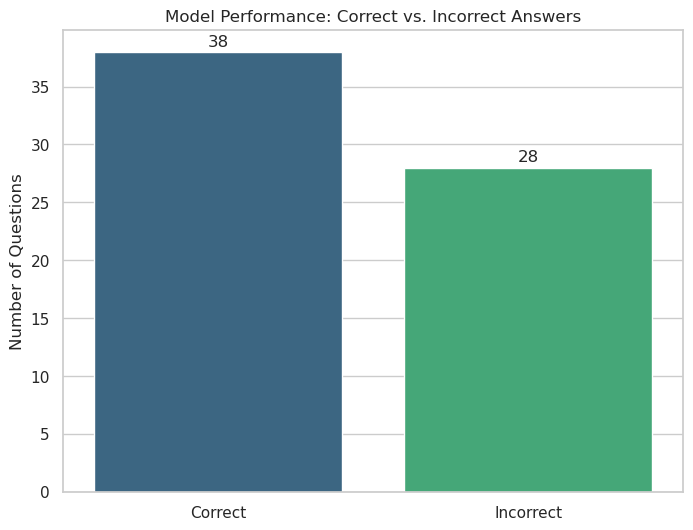

In [6]:
# 4.1.1 Bar Chart of Correct vs. Incorrect Answers

# Prepare data for plotting
status = ['Correct', 'Incorrect']
counts = [correct_answers, incorrect_answers]

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=status, y=counts, palette='viridis')
plt.title('Model Performance: Correct vs. Incorrect Answers')
plt.ylabel('Number of Questions')

# Add value labels on top of bars
for index, value in enumerate(counts):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=12)

plt.show()


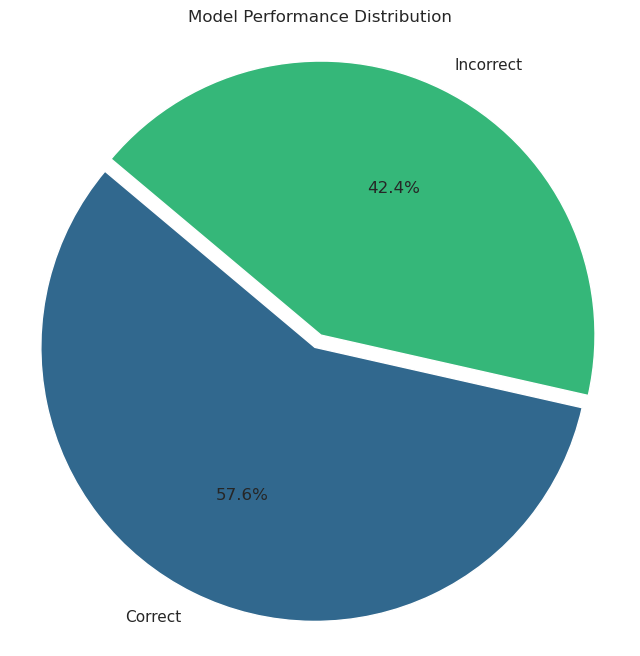

In [7]:
# 4.1.2 Pie Chart of Correct vs. Incorrect Answers

plt.figure(figsize=(8,8))
colors = sns.color_palette('viridis', 2)
plt.pie(counts, labels=status, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0))
plt.title('Model Performance Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
